In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
L0 = 40e3  # mirror length

In [3]:
def radius_of_curvature(coor, value):
    d1 = (value[1:] - value[:-1]) / (coor[1] - coor[0])
    d2 = (d1[1:] - d1[:-1]) / (coor[1] - coor[0])
    R = np.power(1 + d1[1:] ** 2, 1.5) / np.abs(d2)
    return R

def yag_position(D, y0, theta0, theta):
    return (D - L0 / 2. * np.cos(theta0 + theta) + y0 * np.sin(theta0 + theta)) * np.tan(2 * (theta0 + theta))

# M1

Optimization succeed: False
YAG-mirror_center_distance in mm 4100.0
Rotation center offset in mm 43.0
Motor 0deg offset in deg 0.0
Motor 0deg uncertainty in deg 1.199559238986795e+24


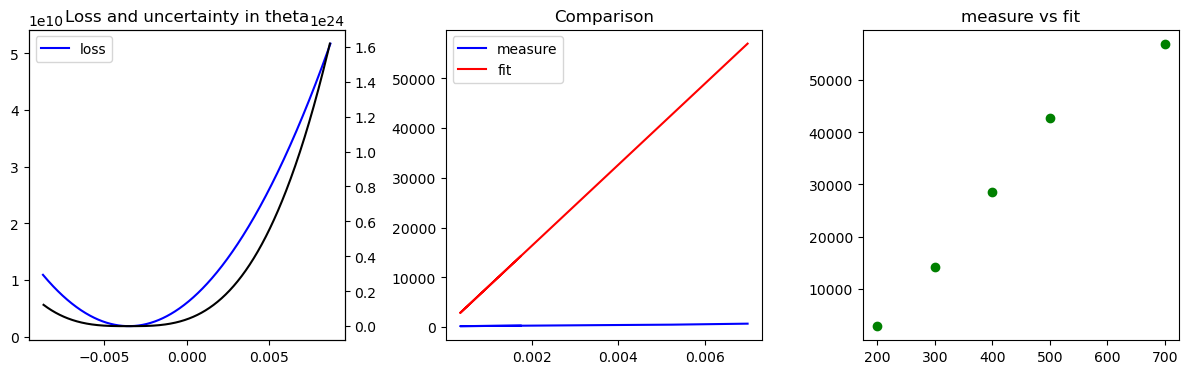

In [4]:
data = np.array([[300, np.deg2rad(0.1)], #(Li  um, thetai  rad)
                 [200, np.deg2rad(0.02)],
                 [400, np.deg2rad(0.2)],
                 [500, np.deg2rad(0.3)],
                 [700, np.deg2rad(0.4)],
                ])

# ----------------------------------
#   Fitting and visualization
def loss(x):
    D = x[0]
    y0 = x[1]
    theta0 = x[2]
    angles = theta0 + data[:,1]
    return np.sum(np.square(data[:,0] - (D - L0 / 2. * np.cos(angles) + y0 * np.sin(angles)) * np.tan(2 * (angles))))
    
result = scipy.optimize.minimize(loss,
                                 x0=np.array((4.1e6, 43e3, 0)),
                                 method='SLSQP',
                                 bounds=((4e6, 4.4e6), (40e3, 46e3), (-np.deg2rad(1), np.deg2rad(1))),
                                 tol=((4 * 6.5 / 4) ** 2 * float(data.shape[0])),  
                                 # 4 pixel per measurement * 6.5 um pixel size / 5 magnification
                                 # Square * number of point
                                )
print("Optimization succeed:", result.success)
result = result.x

# Get the uncertainty of the result by looking at the curve 
angles_scan = np.linspace(-np.deg2rad(0.5), np.deg2rad(0.5), 500) + result[2]
loss_array = np.array([loss(np.array([result[0], result[1], angles_scan[x]])) for x in range(angles_scan.shape[0])])

radius_of_curve = radius_of_curvature(coor=angles_scan, value=loss_array)
uncertainty = radius_of_curve[angles_scan.shape[0] // 2 + 1]

print("YAG-mirror_center_distance in mm", result[0] / 1000)
print("Rotation center offset in mm", result[1] / 1000)
print("Motor 0deg offset in deg", np.rad2deg(result[2]))
print("Motor 0deg uncertainty in deg", np.rad2deg(uncertainty))


# Visualization
fig, axes = plt.subplots(ncols=3, nrows=1)
fig.set_figheight(4)
fig.set_figwidth(12)

axes[0].plot(angles_scan, loss_array, label='loss', color='b')
axes0_twin = axes[0].twinx()
axes0_twin.plot(angles_scan[1:-1], 2 * radius_of_curve, label='Uncertainty', color='k')
axes[0].legend()
axes[0].set_title("Loss and uncertainty in theta")

axes[1].plot(data[:,1], data[:,0], label='measure', color='b')
axes[1].plot(data[:,1], yag_position(result[0], result[1], result[2], data[:,1]), label='fit', color='r')
axes[1].set_title("Comparison")
axes[1].legend()

axes[2].scatter(data[:,0], yag_position(result[0], result[1], result[2], data[:,1]), color='g')
axes[2].set_title("measure vs fit")

plt.tight_layout()
plt.show()

# M3

Optimization succeed: False
YAG-mirror_center_distance in mm 142.0
Rotation center offset in mm -3.0233372535887187e-19
Motor 0deg offset in deg -0.012001116545825741
Motor 0deg uncertainty in deg 15014365242933.342


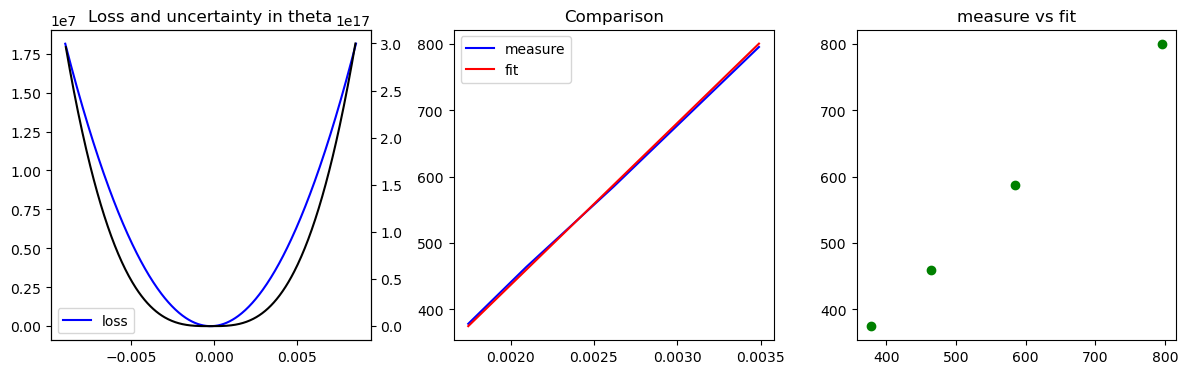

In [37]:
data = np.array([[-(1218 - 1509) * 6.5 / 5, np.deg2rad(0.1)], #(Li  um, thetai  rad)
                 [-(1152 - 1509) * 6.5 / 5, np.deg2rad(0.12)],
                 [-(1059 - 1509) * 6.5 / 5, np.deg2rad(0.15)],
                 [-(897 - 1509) * 6.5 / 5, np.deg2rad(0.2)],
                ])

# ----------------------------------
#   Fitting and visualization
def loss(x):
    D = x[0]
    y0 = x[1]
    theta0 = x[2]
    angles = theta0 + data[:,1]
    return np.sum(np.square(data[:,0] - (D - L0 / 2. * np.cos(angles) + y0 * np.sin(angles)) * np.tan(2 * (angles))))
    
result = scipy.optimize.minimize(loss,
                                 x0=np.array((142e3, 0e3, -np.deg2rad(0.012))),
                                 method='CG',
                                 #bounds=((20e3, 400e3), (-5e3, 5e3), (-np.deg2rad(1), np.deg2rad(1))),
                                 #tol=((4 * 6.5) ** 2 * float(data.shape[0])),  
                                 # 4 pixel per measurement * 6.5 um pixel size / 5 magnification
                                 # Square * number of point
                                )
print("Optimization succeed:", result.success)
result = result.x

# Get the uncertainty of the result by looking at the curve 
angles_scan = np.linspace(-np.deg2rad(0.5), np.deg2rad(0.5), 500) + result[2]
loss_array = np.array([loss(np.array([result[0], result[1], angles_scan[x]])) for x in range(angles_scan.shape[0])])

radius_of_curve = radius_of_curvature(coor=angles_scan, value=loss_array)
uncertainty = radius_of_curve[angles_scan.shape[0] // 2 + 1]

print("YAG-mirror_center_distance in mm", result[0] / 1000)
print("Rotation center offset in mm", result[1] / 1000)
print("Motor 0deg offset in deg", np.rad2deg(result[2]))
print("Motor 0deg uncertainty in deg", np.rad2deg(uncertainty))


# Visualization
fig, axes = plt.subplots(ncols=3, nrows=1)
fig.set_figheight(4)
fig.set_figwidth(12)

axes[0].plot(angles_scan, loss_array, label='loss', color='b')
axes0_twin = axes[0].twinx()
axes0_twin.plot(angles_scan[1:-1], 2 * radius_of_curve, label='Uncertainty', color='k')
axes[0].legend()
axes[0].set_title("Loss and uncertainty in theta")

axes[1].plot(data[:,1], data[:,0], label='measure', color='b')
axes[1].plot(data[:,1], yag_position(result[0], result[1], result[2], data[:,1]), label='fit', color='r')
axes[1].set_title("Comparison")
axes[1].legend()

axes[2].scatter(data[:,0], yag_position(result[0], result[1], result[2], data[:,1]), color='g')
axes[2].set_title("measure vs fit")

plt.tight_layout()
plt.show()

In [24]:
np.rad2deg(np.arctan(6.5 / 5 / 142e3))

0.000524538826513564

Optimization succeed: False
YAG-mirror_center_distance in mm 139.0
Rotation center offset in mm 2.380685309436e-18
Motor 0deg offset in deg -0.009146885660649756
Motor 0deg uncertainty in deg 10845477123828.834


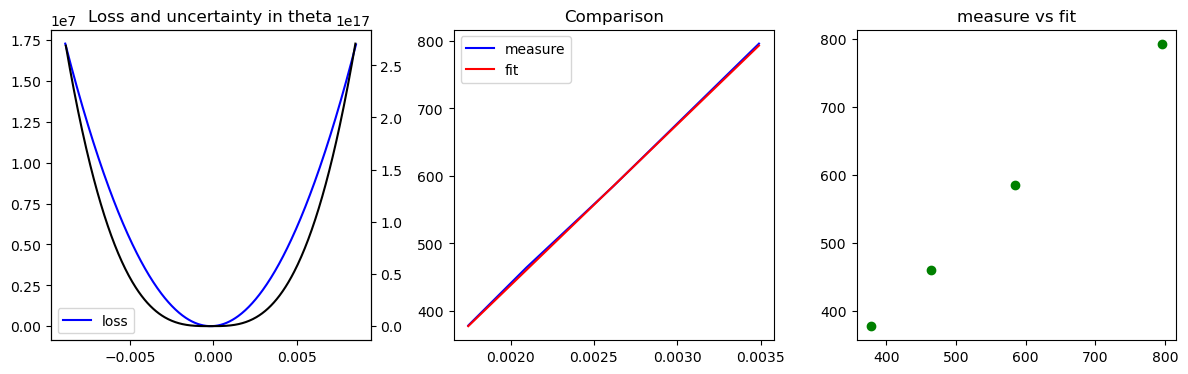

In [38]:
data = np.array([[-(1218 - 1509) * 6.5 / 5, np.deg2rad(0.1)], #(Li  um, thetai  rad)
                 [-(1152 - 1509) * 6.5 / 5, np.deg2rad(0.12)],
                 [-(1059 - 1509) * 6.5 / 5, np.deg2rad(0.15)],
                 [-(897 - 1509) * 6.5 / 5, np.deg2rad(0.2)],
                ])

# ----------------------------------
#   Fitting and visualization
def loss(x):
    D = x[0]
    y0 = x[1]
    theta0 = x[2]
    angles = theta0 + data[:,1]
    return np.sum(np.square(data[:,0] - (D - L0 / 2. * np.cos(angles) + y0 * np.sin(angles)) * np.tan(2 * (angles))))
    
result = scipy.optimize.minimize(loss,
                                 x0=np.array((139e3, 0e3, -np.deg2rad(0.012))),
                                 method='CG',
                                 #bounds=((20e3, 400e3), (-5e3, 5e3), (-np.deg2rad(1), np.deg2rad(1))),
                                 #tol=((4 * 6.5) ** 2 * float(data.shape[0])),  
                                 # 4 pixel per measurement * 6.5 um pixel size / 5 magnification
                                 # Square * number of point
                                )
print("Optimization succeed:", result.success)
result = result.x

# Get the uncertainty of the result by looking at the curve 
angles_scan = np.linspace(-np.deg2rad(0.5), np.deg2rad(0.5), 500) + result[2]
loss_array = np.array([loss(np.array([result[0], result[1], angles_scan[x]])) for x in range(angles_scan.shape[0])])

radius_of_curve = radius_of_curvature(coor=angles_scan, value=loss_array)
uncertainty = radius_of_curve[angles_scan.shape[0] // 2 + 1]

print("YAG-mirror_center_distance in mm", result[0] / 1000)
print("Rotation center offset in mm", result[1] / 1000)
print("Motor 0deg offset in deg", np.rad2deg(result[2]))
print("Motor 0deg uncertainty in deg", np.rad2deg(uncertainty))


# Visualization
fig, axes = plt.subplots(ncols=3, nrows=1)
fig.set_figheight(4)
fig.set_figwidth(12)

axes[0].plot(angles_scan, loss_array, label='loss', color='b')
axes0_twin = axes[0].twinx()
axes0_twin.plot(angles_scan[1:-1], 2 * radius_of_curve, label='Uncertainty', color='k')
axes[0].legend()
axes[0].set_title("Loss and uncertainty in theta")

axes[1].plot(data[:,1], data[:,0], label='measure', color='b')
axes[1].plot(data[:,1], yag_position(result[0], result[1], result[2], data[:,1]), label='fit', color='r')
axes[1].set_title("Comparison")
axes[1].legend()

axes[2].scatter(data[:,0], yag_position(result[0], result[1], result[2], data[:,1]), color='g')
axes[2].set_title("measure vs fit")

plt.tight_layout()
plt.show()

# M2

Optimization succeed: False
YAG-mirror_center_distance in mm 132.0
Rotation center offset in mm -2.797589359887464e-17
Motor 0deg offset in deg -0.022935202173299248
Motor 0deg uncertainty in deg 10665760698895.0


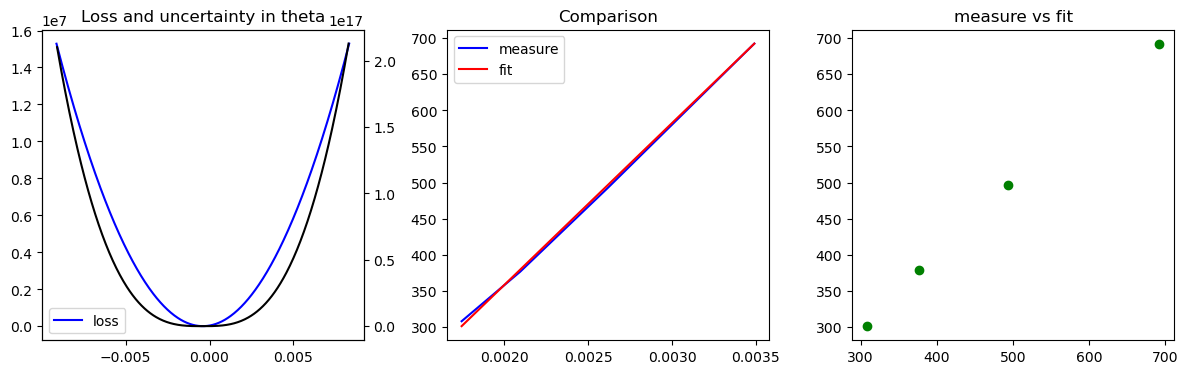

In [51]:
data = np.array([[(654 - 417) * 6.5 / 5, np.deg2rad(0.1)], #(Li  um, thetai  rad)
                 [(706.7 - 417) * 6.5 / 5, np.deg2rad(0.12)],
                 [(796.1 - 417) * 6.5 / 5, np.deg2rad(0.15)],
                 [(949.5 - 417) * 6.5 / 5, np.deg2rad(0.2)],
                ])

# ----------------------------------
#   Fitting and visualization
def loss(x):
    D = x[0]
    y0 = x[1]
    theta0 = x[2]
    angles = theta0 + data[:,1]
    return np.sum(np.square(data[:,0] - (D - L0 / 2. * np.cos(angles) + y0 * np.sin(angles)) * np.tan(2 * (angles))))
    
result = scipy.optimize.minimize(loss,
                                 x0=np.array((132e3, 0e3, -np.deg2rad(0.))),
                                 method='CG',
                                 #bounds=((20e3, 400e3), (-5e3, 5e3), (-np.deg2rad(1), np.deg2rad(1))),
                                 #tol=((4 * 6.5) ** 2 * float(data.shape[0])),  
                                 # 4 pixel per measurement * 6.5 um pixel size / 5 magnification
                                 # Square * number of point
                                )
print("Optimization succeed:", result.success)
result = result.x

# Get the uncertainty of the result by looking at the curve 
angles_scan = np.linspace(-np.deg2rad(0.5), np.deg2rad(0.5), 500) + result[2]
loss_array = np.array([loss(np.array([result[0], result[1], angles_scan[x]])) for x in range(angles_scan.shape[0])])

radius_of_curve = radius_of_curvature(coor=angles_scan, value=loss_array)
uncertainty = radius_of_curve[angles_scan.shape[0] // 2 + 1]

print("YAG-mirror_center_distance in mm", result[0] / 1000)
print("Rotation center offset in mm", result[1] / 1000)
print("Motor 0deg offset in deg", np.rad2deg(result[2]))
print("Motor 0deg uncertainty in deg", np.rad2deg(uncertainty))


# Visualization
fig, axes = plt.subplots(ncols=3, nrows=1)
fig.set_figheight(4)
fig.set_figwidth(12)

axes[0].plot(angles_scan, loss_array, label='loss', color='b')
axes0_twin = axes[0].twinx()
axes0_twin.plot(angles_scan[1:-1], 2 * radius_of_curve, label='Uncertainty', color='k')
axes[0].legend()
axes[0].set_title("Loss and uncertainty in theta")

axes[1].plot(data[:,1], data[:,0], label='measure', color='b')
axes[1].plot(data[:,1], yag_position(result[0], result[1], result[2], data[:,1]), label='fit', color='r')
axes[1].set_title("Comparison")
axes[1].legend()

axes[2].scatter(data[:,0], yag_position(result[0], result[1], result[2], data[:,1]), color='g')
axes[2].set_title("measure vs fit")

plt.tight_layout()
plt.show()

Optimization succeed: False
YAG-mirror_center_distance in mm 130.99999999999997
Rotation center offset in mm -2.4147989876453424e-17
Motor 0deg offset in deg -0.021858074363871983
Motor 0deg uncertainty in deg 10289801595695.453


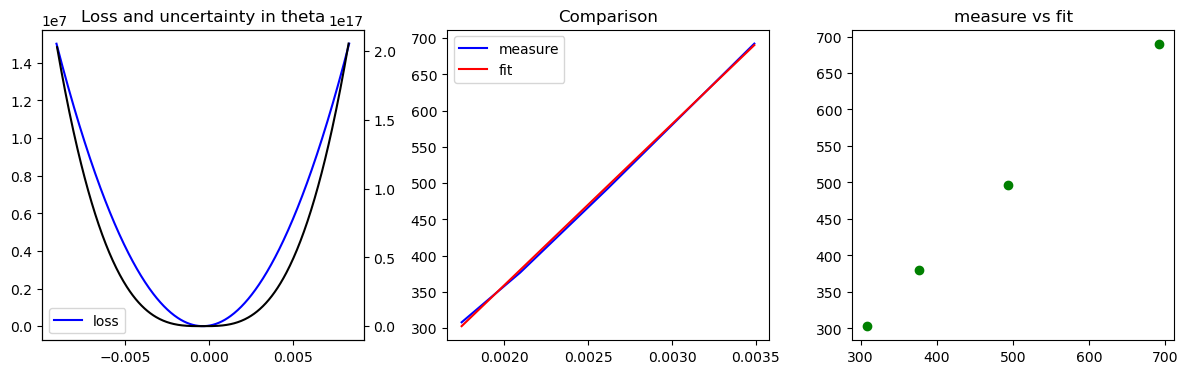

In [50]:
data = np.array([[(654 - 417) * 6.5 / 5, np.deg2rad(0.1)], #(Li  um, thetai  rad)
                 [(706.7 - 417) * 6.5 / 5, np.deg2rad(0.12)],
                 [(796.1 - 417) * 6.5 / 5, np.deg2rad(0.15)],
                 [(949.5 - 417) * 6.5 / 5, np.deg2rad(0.2)],
                ])

# ----------------------------------
#   Fitting and visualization
def loss(x):
    D = x[0]
    y0 = x[1]
    theta0 = x[2]
    angles = theta0 + data[:,1]
    return np.sum(np.square(data[:,0] - (D - L0 / 2. * np.cos(angles) + y0 * np.sin(angles)) * np.tan(2 * (angles))))
    
result = scipy.optimize.minimize(loss,
                                 x0=np.array((131e3, 0e3, -np.deg2rad(0.))),
                                 method='CG',
                                 #bounds=((20e3, 400e3), (-5e3, 5e3), (-np.deg2rad(1), np.deg2rad(1))),
                                 #tol=((4 * 6.5) ** 2 * float(data.shape[0])),  
                                 # 4 pixel per measurement * 6.5 um pixel size / 5 magnification
                                 # Square * number of point
                                )
print("Optimization succeed:", result.success)
result = result.x

# Get the uncertainty of the result by looking at the curve 
angles_scan = np.linspace(-np.deg2rad(0.5), np.deg2rad(0.5), 500) + result[2]
loss_array = np.array([loss(np.array([result[0], result[1], angles_scan[x]])) for x in range(angles_scan.shape[0])])

radius_of_curve = radius_of_curvature(coor=angles_scan, value=loss_array)
uncertainty = radius_of_curve[angles_scan.shape[0] // 2 + 1]

print("YAG-mirror_center_distance in mm", result[0] / 1000)
print("Rotation center offset in mm", result[1] / 1000)
print("Motor 0deg offset in deg", np.rad2deg(result[2]))
print("Motor 0deg uncertainty in deg", np.rad2deg(uncertainty))


# Visualization
fig, axes = plt.subplots(ncols=3, nrows=1)
fig.set_figheight(4)
fig.set_figwidth(12)

axes[0].plot(angles_scan, loss_array, label='loss', color='b')
axes0_twin = axes[0].twinx()
axes0_twin.plot(angles_scan[1:-1], 2 * radius_of_curve, label='Uncertainty', color='k')
axes[0].legend()
axes[0].set_title("Loss and uncertainty in theta")

axes[1].plot(data[:,1], data[:,0], label='measure', color='b')
axes[1].plot(data[:,1], yag_position(result[0], result[1], result[2], data[:,1]), label='fit', color='r')
axes[1].set_title("Comparison")
axes[1].legend()

axes[2].scatter(data[:,0], yag_position(result[0], result[1], result[2], data[:,1]), color='g')
axes[2].set_title("measure vs fit")

plt.tight_layout()
plt.show()